import libraries

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
glass = pd.read_csv("glass.csv")

In [ ]:
glass

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [ ]:
features = glass.columns[:-1].tolist()
glass.shape

(214, 10)

In [ ]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Summarize the data

In [ ]:
glass.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
print('The input features of the data is:')
X = glass.drop('Type',axis = 1)
X

The input features of the data is:


RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

In [ ]:
print('Output of our data set is')
y = glass['Type']
y

Output of our data set is


0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# **Data Visualization**

univariate plots

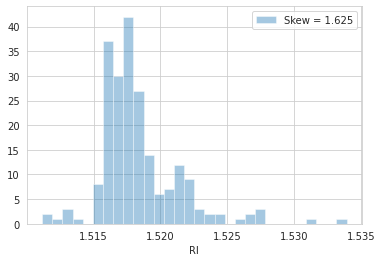

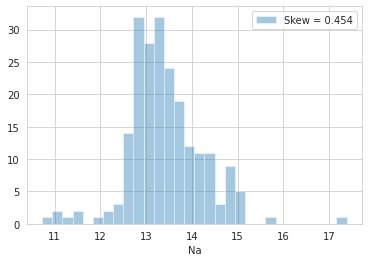

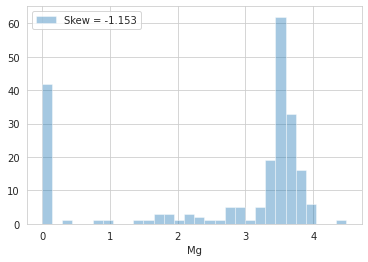

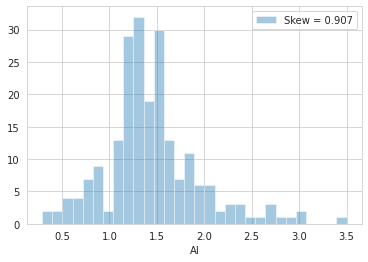

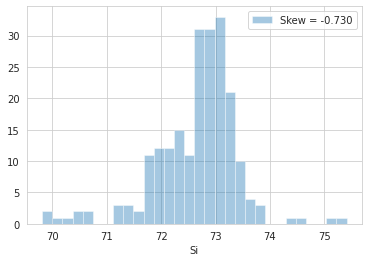

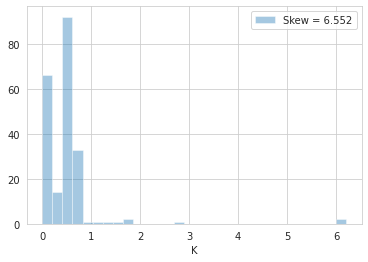

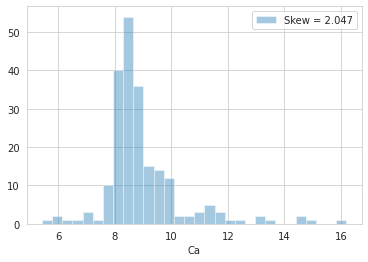

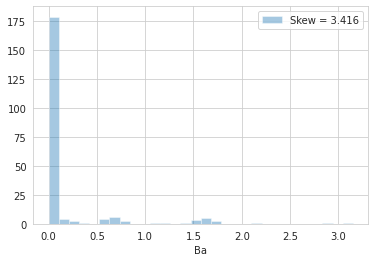

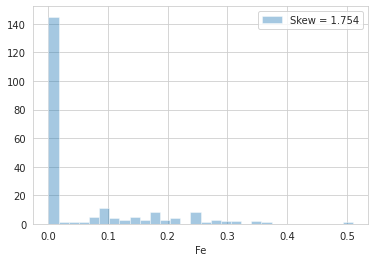

In [ ]:
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

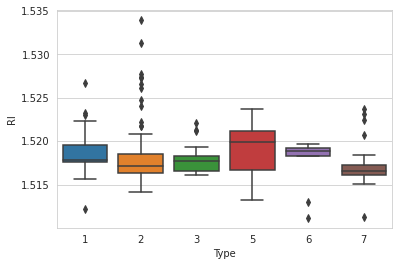

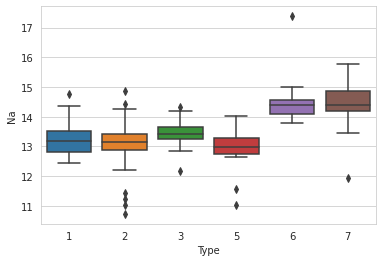

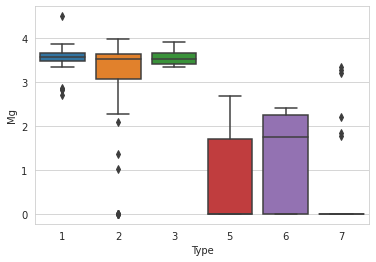

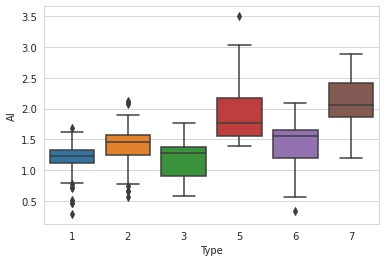

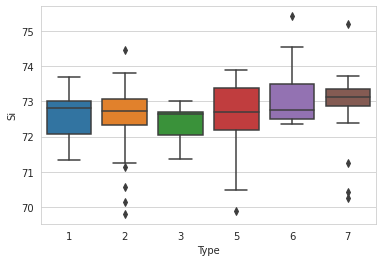

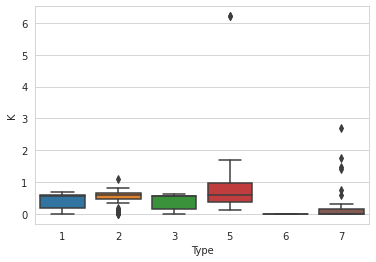

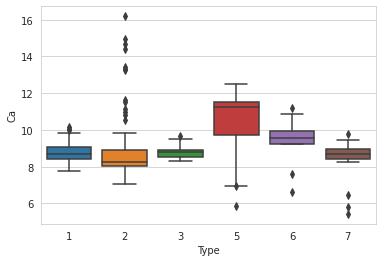

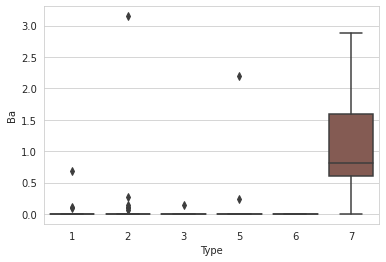

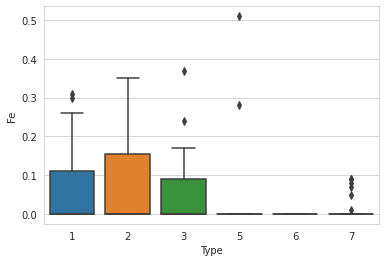

In [ ]:
for i in range(0,9):
    sns.boxplot(x = "Type" , y = features[i] , data = glass)
    plt.ylabel(features[i])
    plt.show()

### **Checking the presence of null values in the Dataset**

In [ ]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X)

### **Checking Outliers in the Dataset **

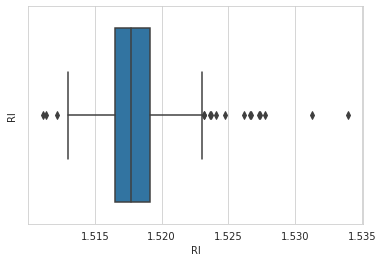

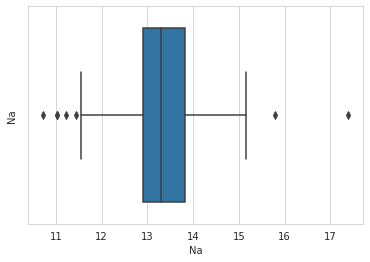

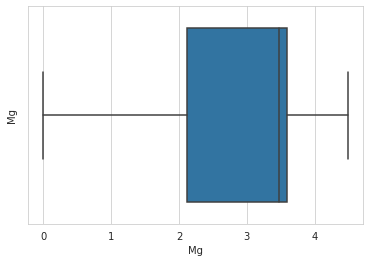

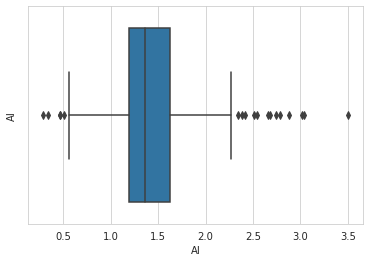

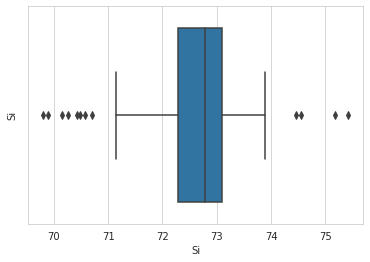

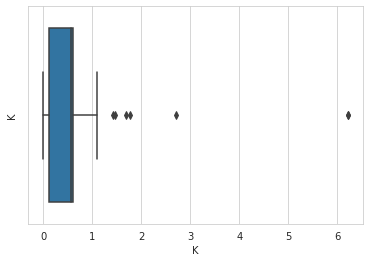

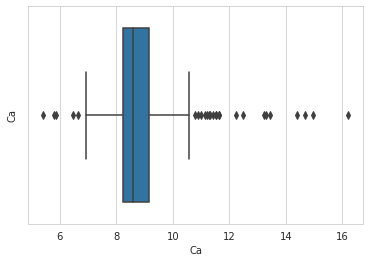

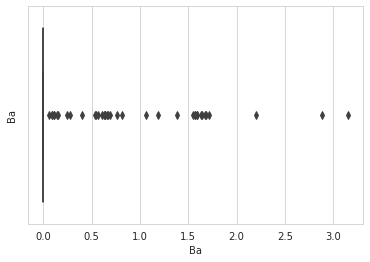

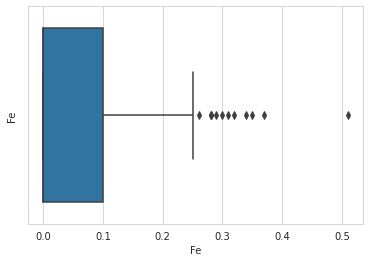

In [ ]:
for i in range(0,9):
       sns.boxplot(x = features[i],data = glass)
       plt.ylabel(features[i])
       plt.show()

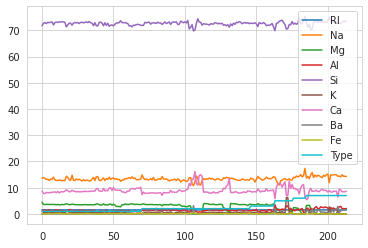

In [ ]:
glass.plot()

HISTOGRAM





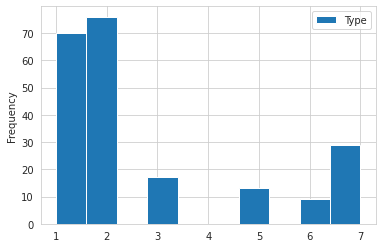

In [ ]:
glass.plot(kind ='hist',y='Type')
plt.show()

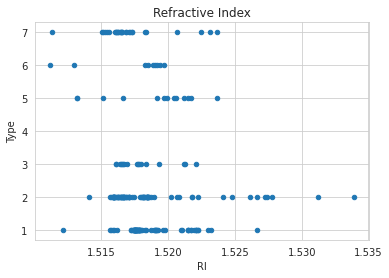

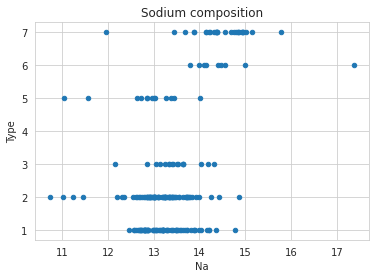

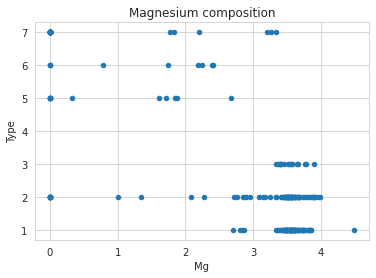

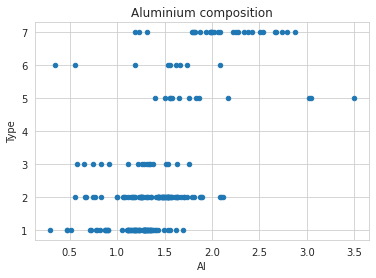

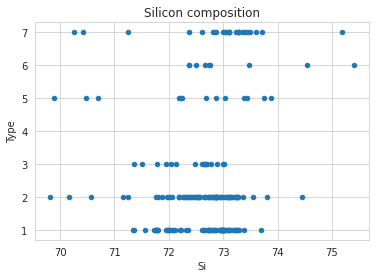

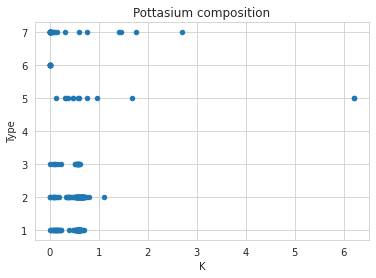

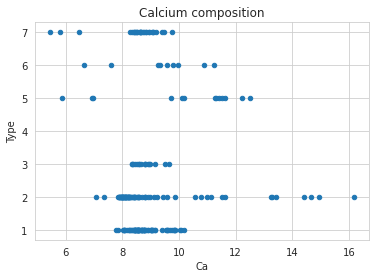

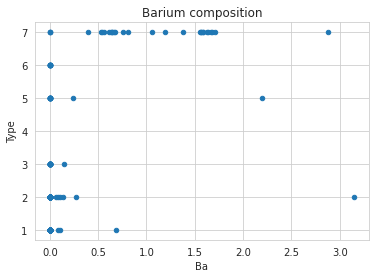

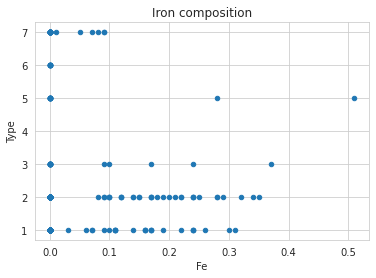

In [ ]:

glass.plot(kind ='scatter',x='RI',y='Type')
plt.title('Refractive Index')
plt.show()

glass.plot(kind ='scatter',x='Na',y='Type')
plt.title('Sodium composition')
plt.show()

glass.plot(kind ='scatter',x='Mg',y='Type')
plt.title('Magnesium composition')
plt.show()

glass.plot(kind ='scatter',x='Al',y='Type')
plt.title('Aluminium composition')
plt.show()

glass.plot(kind ='scatter',x='Si',y='Type')
plt.title('Silicon composition')
plt.show()

glass.plot(kind ='scatter',x='K',y='Type')
plt.title('Pottasium composition')
plt.show()

glass.plot(kind ='scatter',x='Ca',y='Type')
plt.title('Calcium composition')
plt.show()

glass.plot(kind ='scatter',x='Ba',y='Type')
plt.title('Barium composition')
plt.show()

glass.plot(kind ='scatter',x='Fe',y='Type')
plt.title('Iron composition')
plt.show()


In [ ]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = glass[features]
y = glass[label]

**Pairplot** to plot bivariate distributions

<Figure size 720x720 with 0 Axes>

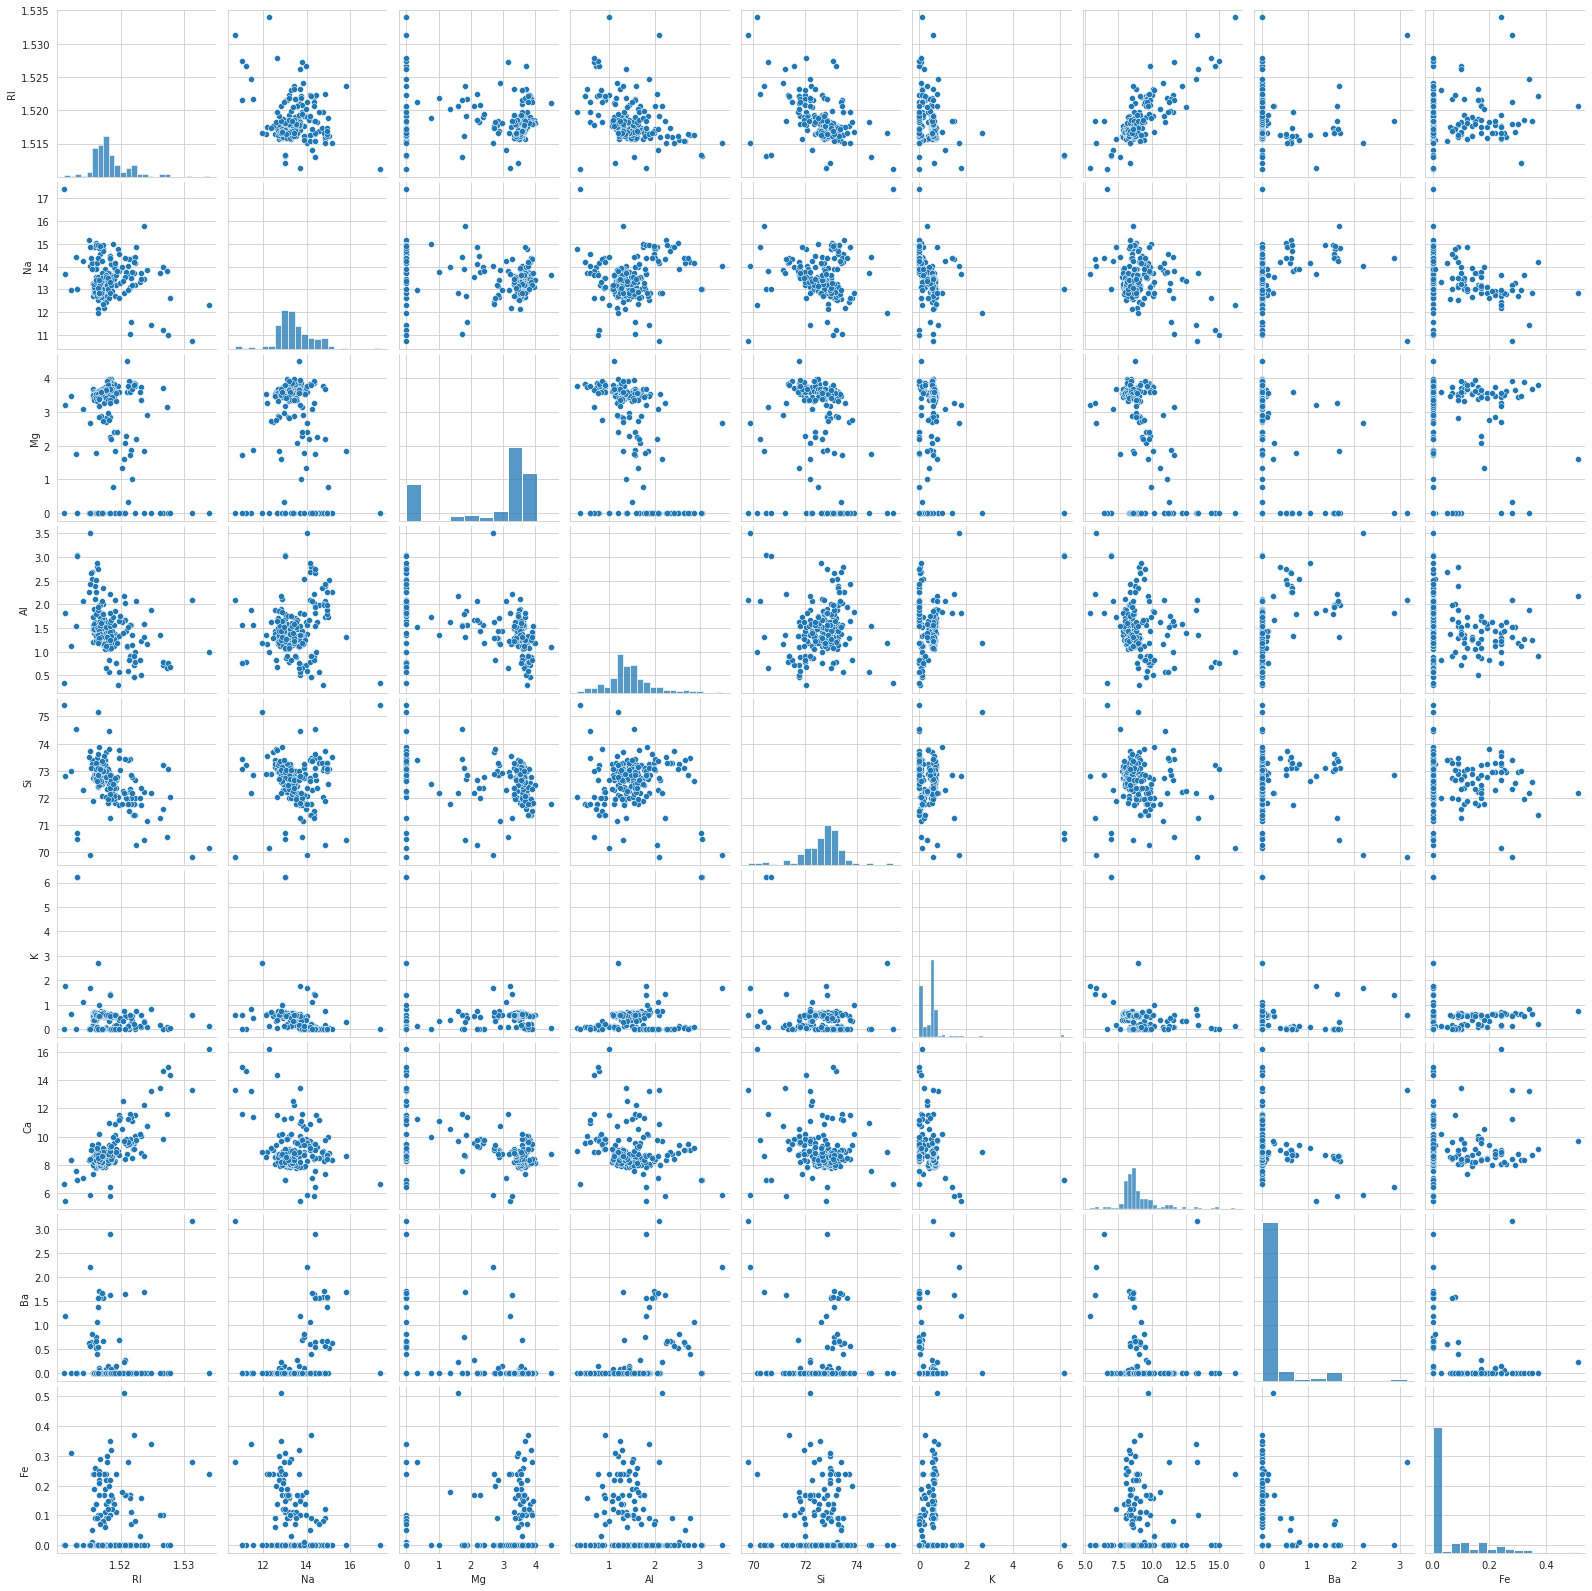

In [ ]:
import seaborn as sns
x2 = pd.DataFrame(X)

plt.figure(figsize=(10,10))
sns.pairplot(data=x2)
plt.show()

In [ ]:
glass.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.744993  
Al    0.479404 -0.074402  0.598829  
Si   -0.102151 -0.094201  0.151565  
K    -0.042618 -0.007719 -0.010054  
Ca   -0.112841  0.124968  0.000952  
Ba    1.000000 -0.058692  0.575161  
Fe   -0.058692  1.000000 -0.188278  
Type  0.575161 -0.188278  1.000000

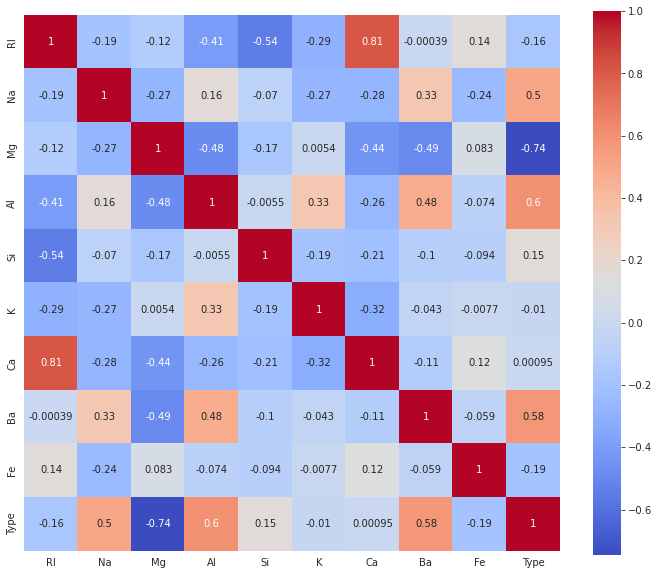

In [ ]:
correlation= glass.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True,cmap= 'coolwarm')
plt.show()

In [ ]:
#x needed
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,train_size=0.70, test_size=0.30)

# logistic Regression

              precision    recall  f1-score   support

           1       0.42      0.71      0.53        14
           2       0.50      0.58      0.54        26
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.60      0.86      0.71         7

    accuracy                           0.48        65
   macro avg       0.25      0.36      0.29        65
weighted avg       0.35      0.48      0.40        65

Classification Accuracy = 0.47692307692307695


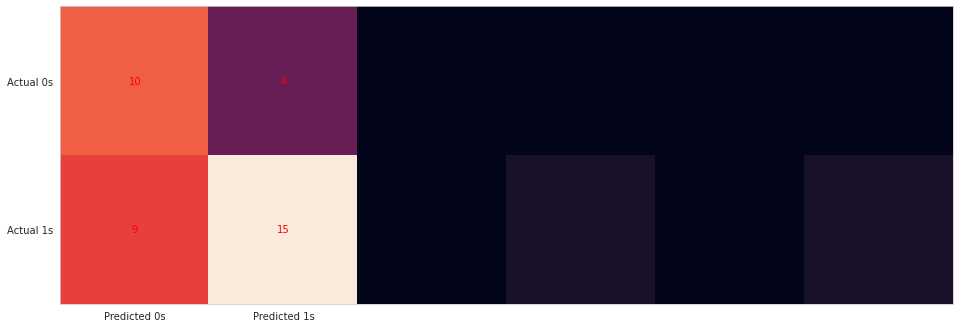

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
clf1 = OneVsRestClassifier(LogisticRegression(C =10 , random_state=1367))
clf1.fit(X_train , y_train)
y1 = clf1.predict(X_test)
print (classification_report(y_test , y1))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y1)))
# print("Accuracy for training set: ",tree_model.score(X_train,y_train))
# print("Accuracy for test set: ",tree_model.score(X_test,y_test))
#confusion matrix
cm = confusion_matrix(y_test, clf1.predict(X_test))

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
tree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
end = time.time()
print("Accuracy for training set: ",tree_model.score(X_train,y_train))
print("Accuracy for test set: ",tree_model.score(X_test,y_test))
print((end - start)*10**3)

Accuracy for training set:  1.0
Accuracy for test set:  0.676923076923077
11.790275573730469


# Random Forest 

Classification Accuracy = 0.5692307692307692


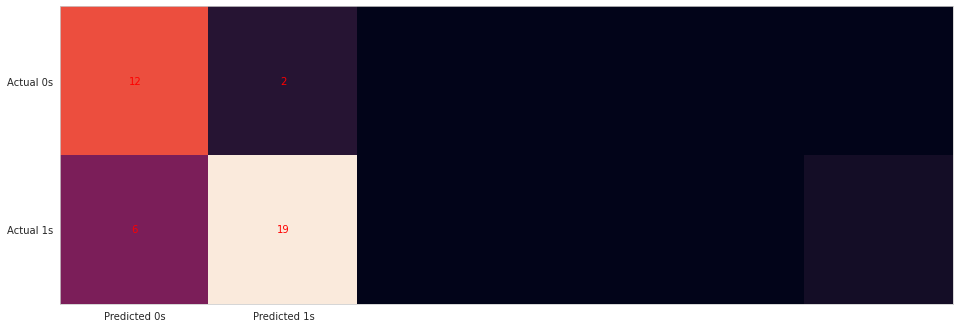

In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf4 = OneVsRestClassifier(RandomForestClassifier(n_estimators=200 ,min_samples_split=2 ,min_samples_leaf=5, n_jobs=-1,  random_state=1367))
clf4.fit(X_train , y_train)
y4 = clf4.predict(X_test)
#print (classification_report(y_test , y4))
print( "Classification Accuracy = " + str(accuracy_score(y_test , y4)))
#confusion matrix
cm = confusion_matrix(y_test, clf4.predict(X_test))

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# KNN algorithm

0.6912751677852349
[0.6923076923076923, 0.5230769230769231, 0.5692307692307692, 0.49230769230769234, 0.5230769230769231, 0.5384615384615384, 0.5846153846153846, 0.5692307692307692, 0.5538461538461539]


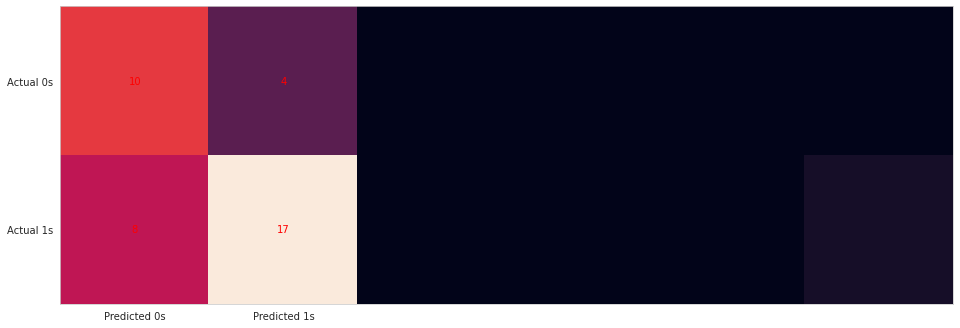

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)


cm = confusion_matrix(y_test, knn.predict(X_test))

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Non-Linear SVM

Accuracy:  0.7583892617449665


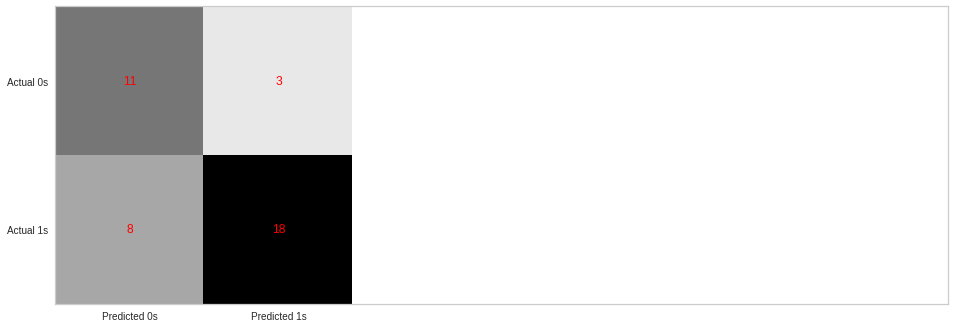

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(gamma='auto').fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

acc_train = svm_model.score(X_train, y_train)
acc_test = svm_model.score(X_test, y_test)

print("Accuracy: ",acc_train)
#confusion matrix
cm = confusion_matrix(y_test, svm_model.predict(X_test))

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
clf2 = OneVsRestClassifier(SVC(kernel='linear',C = 1,probability=True,random_state=1367))
clf2.fit(X_train , y_train)
y2 = clf2.predict(X_test)
print (classification_report(y_test , y2))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y2)))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55        14
           2       0.47      0.27      0.34        26
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.60      0.86      0.71         7

    accuracy                           0.42        65
   macro avg       0.24      0.35      0.27        65
weighted avg       0.33      0.42      0.33        65

Classification Accuracy = 0.4153846153846154


In [ ]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,100), dpi=300)
tree.plot_tree(tree_model)

[Text(0.7093023255813954, 0.95, 'X[7] <= 0.32\ngini = 0.716\nsamples = 149\nvalue = [56, 50, 11, 7, 3, 22]'),
 Text(0.5116279069767442, 0.85, 'X[3] <= 1.42\ngini = 0.648\nsamples = 126\nvalue = [55, 49, 11, 6, 3, 2]'),
 Text(0.313953488372093, 0.75, 'X[6] <= 10.58\ngini = 0.545\nsamples = 81\nvalue = [50, 20, 9, 0, 1, 1]'),
 Text(0.29069767441860467, 0.65, 'X[0] <= 1.517\ngini = 0.514\nsamples = 76\nvalue = [50, 15, 9, 0, 1, 1]'),
 Text(0.09302325581395349, 0.55, 'X[0] <= 1.516\ngini = 0.722\nsamples = 12\nvalue = [2, 3, 5, 0, 1, 1]'),
 Text(0.046511627906976744, 0.45, 'X[5] <= 0.28\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 0, 0, 1, 0]'),
 Text(0.023255813953488372, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.06976744186046512, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0]'),
 Text(0.13953488372093023, 0.45, 'X[0] <= 1.517\ngini = 0.568\nsamples = 9\nvalue = [0, 3, 5, 0, 0, 1]'),
 Text(0.11627906976744186, 0.35, 'X[6] <= 8.13\ngini = 0.449\nsampl

0.6912751677852349
[0.6923076923076923, 0.5230769230769231, 0.5692307692307692, 0.49230769230769234, 0.5230769230769231, 0.5384615384615384, 0.5846153846153846, 0.5692307692307692, 0.5538461538461539]


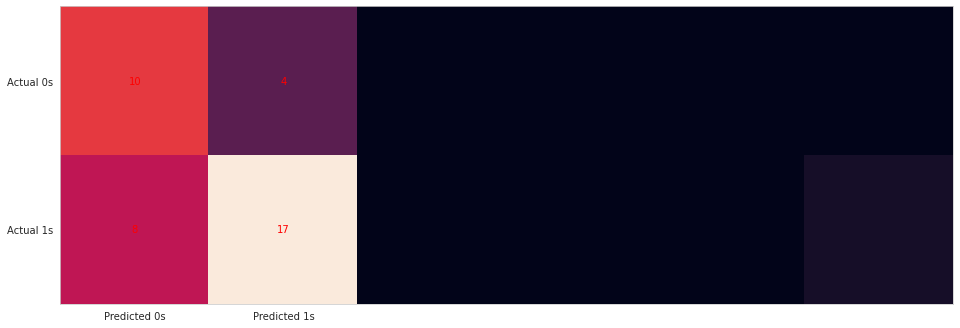

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)


cm = confusion_matrix(y_test, knn.predict(X_test))

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Best Accuracy

In [ ]:
import operator
Accuracy_score = {}

Accuracy_score['Logistic Regression'] = 100
Accuracy_score['Decision Tree'] = 199
Accuracy_score['Random Forest'] = 500
Accuracy_score['K Nearest Neighbours'] = 50
Accuracy_score['Naive Bayes'] = 256
AccuracyMax = max(Accuracy_score.items(), key = operator.itemgetter(1))[0]
print("The best algorithm for our dataset is", AccuracyMax)
print(f"The corresponding accuracy for the algorithm is {Accuracy_score[AccuracyMax]}")

The best algorithm for our dataset is Random Forest
The corresponding accuracy for the algorithm is 500


# REVIEW 2

# K Means Clustering

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_train)
 
print(label)

[1 4 6 4 8 6 4 4 1 4 6 8 4 8 4 4 1 1 4 0 6 8 1 6 4 4 6 4 4 4 1 9 6 8 8 4 4
 8 1 4 4 4 6 7 0 4 5 4 2 1 1 1 6 4 6 1 8 1 4 6 4 6 1 1 7 2 8 6 6 1 4 6 4 4
 4 4 8 4 4 4 6 4 0 6 5 4 4 4 6 0 4 4 4 4 6 4 2 8 4 6 6 6 3 6 4 4 6 4 7 6 4
 4 4 1 4 8 4 8 4 0 4 4 8 8 4 7 6 7 4 2 4 6 6 4 1 4 5 6 4 6 4 0 6 3 4 4 1 6
 4]


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmc = KMeans(n_clusters = 7)
kmc.fit(X_train, y_train)

ykmc = kmc.predict(X_test)
print ("Classification Accuracy = " + str(accuracy_score(y_test , ykmc)))
print (classification_report(y_test , ykmc))

Classification Accuracy = 0.03076923076923077
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        14
           2       0.20      0.08      0.11        26
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         7

    accuracy                           0.03        65
   macro avg       0.03      0.01      0.01        65
weighted avg       0.08      0.03      0.04        65



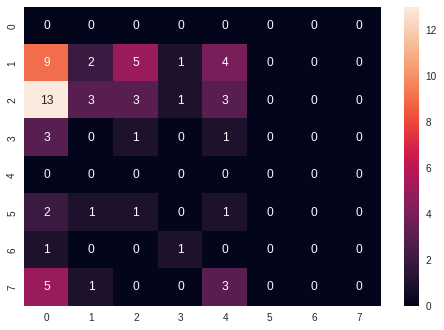

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Kmeans_Confusion_matrix = confusion_matrix(y_test, ykmc)
sns.heatmap(Kmeans_Confusion_matrix, annot=True, fmt='g')

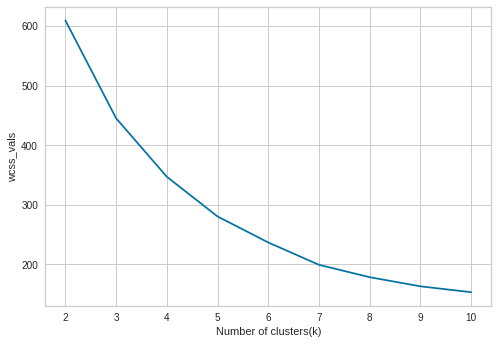

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
i_vals = []

for i in range(2,11):
  i_vals.append(i)
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

plt.plot(i_vals,wcss)
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_vals')  
plt.show()

# Dendogram for Clustering

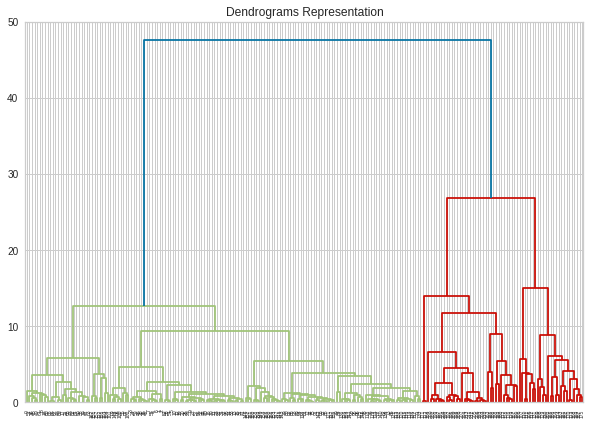

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))  
plt.title("Dendrograms Representation")  
dend = shc.dendrogram(shc.linkage(glass, method='ward'))

# AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(glass)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cluster.fit(X_train)
cluster_y_preds = cluster.fit_predict(X_test)
cluster_y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test_agg = y_test['Type']

In [ ]:
##43
agcl_preds = pd.DataFrame({"Predicted":cluster_y_preds,"Actual":y_test_agg})
agcl_preds

Predicted  Actual
182          0       6
86           1       2
170          0       5
128          1       2
119          1       2
..         ...     ...
138          1       2
164          1       5
59           1       1
94           1       2
125          1       2

[65 rows x 2 columns]

In [ ]:
agcl_TP = len(agcl_preds[(agcl_preds["Predicted"]==agcl_preds["Actual"])&(agcl_preds["Predicted"]==1)])
agcl_FP = len(agcl_preds[(agcl_preds["Predicted"]!=agcl_preds["Actual"])&(agcl_preds["Predicted"]==1)])
agcl_FN = len(agcl_preds[(agcl_preds["Predicted"]!=agcl_preds["Actual"])&(agcl_preds["Predicted"]==0)])
agcl_TN = len(agcl_preds[(agcl_preds["Predicted"]==agcl_preds["Actual"])&(agcl_preds["Predicted"]==0)])
print(agcl_TP,agcl_FP,agcl_FN,agcl_TN)
print("Rightly Classified: ",(agcl_TP+agcl_TN),"/",(agcl_TP+agcl_FP+agcl_FN+agcl_TN))
print("Wrongly Classified: ",(agcl_FP+agcl_FN),"/",(agcl_TP+agcl_FP+agcl_FN+agcl_TN))

agcl_Accuracy = (agcl_TP+agcl_TN)/(agcl_TP+agcl_FP+agcl_FN+agcl_TN)
agcl_Precision = (agcl_TP)/(agcl_TP+agcl_FP)
agcl_Recall = (agcl_TP)/(agcl_TP+agcl_FN)
agcl_Specificity = (agcl_TN)/(agcl_TN+agcl_FP)
agcl_F1 = (2*agcl_Precision*agcl_Recall)/(agcl_Precision+agcl_Recall)

14 32 19 0
Rightly Classified:  14 / 65
Wrongly Classified:  51 / 65


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
accuracy = accuracy_score(y_test, cluster_y_preds)
print("Accuracy Score:",(accuracy))

Accuracy Score: 0.2153846153846154


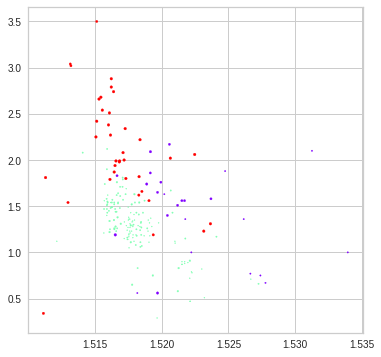

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
  
plt.figure(figsize =(6, 6))
plt.scatter(glass['RI'],glass['Al'], glass['Type'],
           c = ac3.fit_predict(glass), cmap ='rainbow')
plt.show()

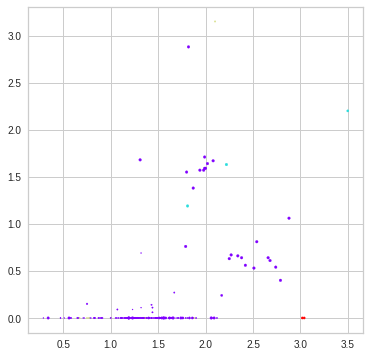

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 4, affinity='manhattan', linkage='average')
  
plt.figure(figsize =(6, 6))
plt.scatter(glass['Al'],glass['Ba'], glass['Type'], c = ac2.fit_predict(glass), cmap ='rainbow')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(glass, cluster.fit_predict(glass)))
silhouette_scores.append(
        silhouette_score(glass, ac3.fit_predict(glass)))
silhouette_scores.append(
        silhouette_score(glass, ac2.fit_predict(glass)))

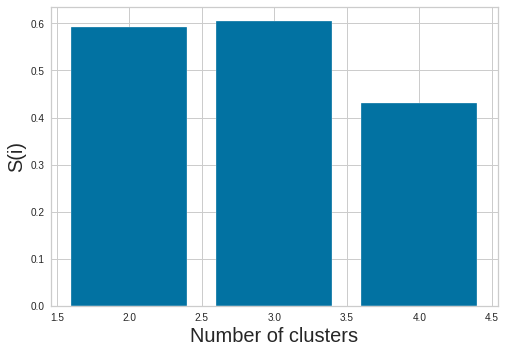

In [ ]:
plt.bar([2,3,4], silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = (GradientBoostingClassifier(n_estimators=100 , random_state=50))
gb.fit(X_train , y_train)
GB_preds = gb.predict(X_test)
print("Classification Accuracy = " + str(accuracy_score(y_test , GB_preds)))
print (classification_report(y_test , GB_preds))

Classification Accuracy = 0.24615384615384617
              precision    recall  f1-score   support

           1       0.25      0.24      0.24        21
           2       0.32      0.39      0.35        23
           3       0.00      0.00      0.00         5
           5       0.33      0.20      0.25         5
           6       0.00      0.00      0.00         2
           7       0.10      0.11      0.11         9

    accuracy                           0.25        65
   macro avg       0.17      0.16      0.16        65
weighted avg       0.23      0.25      0.24        65



In [ ]:
print(GB_preds)

[7 2 2 2 1 7 7 2 3 5 2 2 2 1 2 7 2 1 7 5 5 2 2 2 7 2 1 1 2 1 2 6 1 1 2 1 2
 1 7 1 2 2 1 2 2 6 2 2 1 1 3 7 7 1 7 2 2 2 1 1 1 2 1 2 1]


In [ ]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_y_preds =XGB_model.predict(X_test)
XGB_preds = pd.DataFrame({"Predicted":XGB_y_preds,"Actual":y_test})
XGB_preds

Predicted  Actual
4            7       1
137          3       2
51           2       1
210          2       7
77           1       2
..         ...     ...
46           1       1
32           2       1
169          1       5
202          1       7
5            1       1

[65 rows x 2 columns]

In [ ]:
XGB_TP = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FP = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FN = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
XGB_TN = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
print(XGB_TP,XGB_FP,XGB_FN,XGB_TN)
print("Rightly Classified: ",(XGB_TP+XGB_TN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))
print("Wrongly Classified: ",(XGB_FP+XGB_FN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))

XGB_Accuracy = (XGB_TP+XGB_TN)/(XGB_TP+XGB_TN+XGB_FP+XGB_FN)
XGB_Precision = (XGB_TP)/(XGB_TP+XGB_FP)
XGB_Recall = (XGB_TP)/(XGB_TP+XGB_FN)
XGB_Specificity = (XGB_TN)/(XGB_TN+XGB_FP)
XGB_F1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision+XGB_Recall)

5 18 0 0
Rightly Classified:  5 / 23
Wrongly Classified:  18 / 23


# Dimentionality Reduction

# PCA

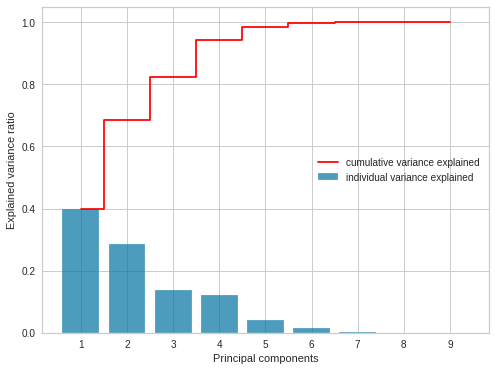

                      P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  2.48  1.78  0.85  0.75  0.25  0.1  0.01  0.0  0.0


In [ ]:
from sklearn.decomposition import PCA # dimensionality reduction#
pca = PCA(random_state = 1)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()


pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=glass['Type'])
fig.show()


It appears that about 99 % of the variance can be explained with the first 5 principal components. However feeding the PCA features to the learning algorithms did not contribute to a better performance. This might be due to the non-linearites that PCA is not able to capture.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X_train)

In [ ]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_train)

Support Vector Classifier: 29.555556 performed in 2.314053 seconds
k-nearest neighbors : 24.166667 performed in 0.146404 seconds
Random forest: 29.527778 performed in 2.536567 seconds
Gradient boosting: 28.194444 performed in 2.778440 seconds
Logistic Regression: 34.833333 performed in 0.099963 seconds
KMeans: 16.027778 performed in 0.227396 seconds


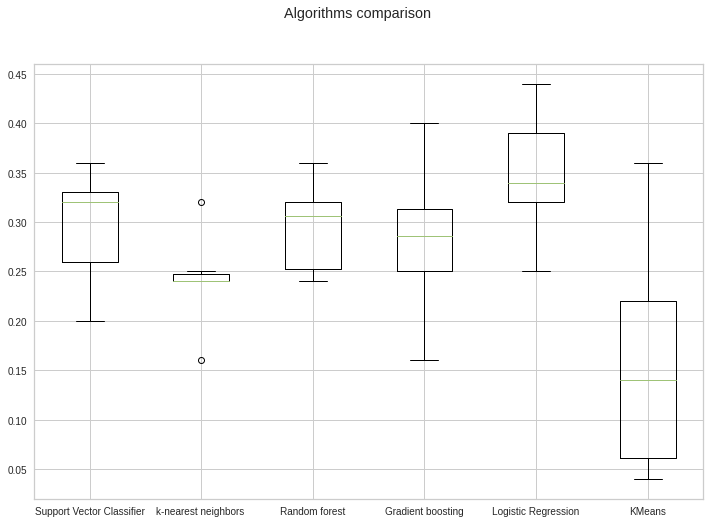

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline 
from time import time
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append( ('Support Vector Classifier',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('SVC', SVC(random_state=None))]) ) )


pipelines.append(('k-nearest neighbors ',
                  Pipeline([ 
                              ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('Random forest',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=None, n_estimators=n_estimators)) ]) ))

pipelines.append( ('Gradient boosting',
                   Pipeline([ 
                             ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('GB', GradientBoostingClassifier(random_state=None)) ]) ))

pipelines.append( ('Logistic Regression',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('LR', LogisticRegression(random_state=None)) ]) ))

pipelines.append( ('KMeans',
                   Pipeline([ 
                             ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('KM', KMeans(random_state=None)) ]) ))


results, names, times  = [], [] , []
num_folds = 6
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                        t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Removing Redundant Parameters**

**PCA Decomposition**

In [ ]:
from sklearn.decomposition import PCA
def pca_transformation(df, n):
    pca_model = PCA(n_components=n)
    
    df = pca_model.fit_transform(df)
    
    columns_list = []
    for i in range(1,n+1):
        columns_list.append("PC"+str(i))
    
    df = pd.DataFrame(df, columns=columns_list)
    
    return df

In [ ]:
Glass_red = pca_transformation(X_train, 5)

In [ ]:
Glass_red

PC1       PC2       PC3       PC4       PC5
0    2.348195 -2.317047 -0.593465 -0.664054 -0.089236
1    0.313411  0.689528 -0.890144  1.115163 -0.118031
2   -0.898356  0.107558 -0.037348  0.021111 -0.045972
3   -0.813956  0.258867 -0.177888  0.556000  0.105195
4   -0.605746  0.853554  0.185455 -1.729050 -0.450234
..        ...       ...       ...       ...       ...
144 -1.131374 -0.343156 -0.284021  0.436576  0.011455
145 -1.257590 -0.253646 -0.142211  0.514553  0.108891
146  2.710590 -1.597272 -0.364511  0.173006  0.468580
147 -0.697342  0.911245  0.295596  0.010642 -0.025326
148 -0.758802  0.596146  0.009141  0.441535  0.112328

[149 rows x 5 columns]

**Observation:** The best performances are achieved by RF. However, RF also yields a wide distribution. It is worthy to continue our study by tuning RF.

**Logistic Regression performs badly.** This might be due to the fact that the data is not normally distributed as these algorithms perform well when data that is normally distributed.

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train.values.ravel()) #to change y into Is array - error

print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
import sklearn.metrics as metrics
model = grid.best_estimator_
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.6153846153846154


**Observation:** The best performances are achieved by RF. However, RF also 
yields a wide distribution. It is worthy to continue our study by tuning RF.

**Logistic Regression performs badly.** This might be due to the fact that the 
data is not normally distributed as these algorithms perform well when data 
that is normally distributed.

# Neural Networks

In [ ]:
y = glass["Type"]

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)
ynn = mlp.predict(x_test)
print("Accuracy Score: ",accuracy_score(ynn,y_test))

Accuracy Score:  0.35384615384615387


In [ ]:
y = glass["Type"]

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='logistic', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)
ynn = mlp.predict(x_test)
print("Accuracy Score: ",accuracy_score(ynn,y_test))

Accuracy Score:  0.38461538461538464


**Observations:**

Gradient Boosting performs better than all other algorithms for this classification problem